# Lossy Decimal Compression Algorithm

In [3]:
import numpy as np 
import pandas as pd
import os
import time

def round_decimals(filename, desired_decimals):
    
    start = time.time()
    global file_size_after, file_size_before, final
    
    file = pd.read_csv(filename)
    file_size_before = os.stat(filename).st_size
    
    numeric = ["float64", "float32", "float16"]
    
    if desired_decimals < 0:
        return print("Negative decimal amount is not possible")
    if desired_decimals == 0: 
        for colname, coltype in file.dtypes.iteritems():
            if coltype in numeric:
                file[[colname]] = file[[colname]].fillna(0.0).applymap(np.int64)
                file[colname] = np.round(file[colname], desired_decimals)
                print(f"Column '{colname}' converted to {desired_decimals} decimals")
    else:
        for colname, coltype in file.dtypes.iteritems():
            if coltype in numeric:
                file[colname] = np.round(file[colname], desired_decimals)
                print(f"Column '{colname}' converted to {desired_decimals} decimals")
    
    file.to_csv("decimal_reduced_dataset.csv")
    file_size_after = os.stat("decimal_reduced_dataset.csv").st_size
    
    compression_ratio = file_size_after/file_size_before
    compression_factor = file_size_before/file_size_after
    saving_percentage = ((file_size_before - file_size_after)/file_size_before) * 100
    
    print()
    print("Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.")
    print()
    print(f" File storage usage decreased from"
              f" {file_size_before:.2f} Bytes to {file_size_after:.2f} Bytes")
    print()
    print(f" Compression ratio:" f" {compression_ratio:.2f}")
    print(f" Compression factor:"
              f" {compression_factor:.2f}")
    print(f" Saving percentage:"
              f" {saving_percentage:.2f}%")
    
    end = time.time()
    print(f" Seconds the algorithm takes to run:" f"{end-start}")
    final = end-start

    return final 

# Linear Model Algorithm

In [8]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

def visuals(filename, max_decimals, desired_decimals): 
    global csvstorage, decimals, float_lst, ratio, factor, saving
    
    csvstorage = [] 
    decimals = []
    ratio = []
    factor = []
    saving = []
    float_lst = ["float64", "float32", "float16"]
    
    if desired_decimals == 0: 
        return print("Predictions not reliable for desired decimals = 0.")
    if max_decimals < 0:
        return print("Negative decimal amount is not possible")
    if max_decimals == 1 or max_decimals == 0: 
        return print("Decimal amount should at least be >= 2 for a linear model")
    for i in range(1,max_decimals + 1): 
        file = pd.read_csv(filename)
        if i == 0:
            for colname, coltype in file.dtypes.iteritems():
                if coltype in float_lst:
                    file[[colname]] = file[[colname]].fillna(0.0).applymap(np.int64)
                    file[colname] = np.round(file[colname], i)
            file.to_csv("linear_model0.csv")
            size = os.stat("linear_model0.csv").st_size
            compression_ratio = size/file_size_before
            compression_factor = file_size_before/size
            saving_percentage = ((file_size_before - size)/file_size_before) * 100
            ratio.append(compression_ratio)
            factor.append(compression_factor)
            saving.append(saving_percentage)
            csvstorage.append(size)
            decimals.append(i)
        else: 
            for colname, coltype in file.dtypes.iteritems():
                if coltype in float_lst:
                    file[colname] = np.round(file[colname], i)
            file.to_csv("linear_model.csv")
            size = os.stat("linear_model.csv").st_size
            compression_ratio = size/file_size_before
            compression_factor = file_size_before/size
            saving_percentage = ((file_size_before - size)/file_size_before) * 100
            ratio.append(compression_ratio)
            factor.append(compression_factor)
            saving.append(saving_percentage)
            csvstorage.append(size)
            decimals.append(i)
            
    #dataframes for creation of       
    df = pd.DataFrame({"decimal_amount": decimals,'csv_storage_size': csvstorage})
    df1 = pd.DataFrame({"decimal_amount": decimals,'compression_ratio': ratio})
    df2 = pd.DataFrame({"decimal_amount": decimals,'ccompression_factor': factor})
    df3 = pd.DataFrame({"decimal_amount": decimals,'saving_percentage': saving})
    
    X = df.decimal_amount.values.reshape((-1, 1))
    y = df.csv_storage_size.values 
    
    df = df.set_index("decimal_amount")
    df1 = df1.set_index("decimal_amount")
    df2 = df2.set_index("decimal_amount")
    df3 = df3.set_index("decimal_amount")

    
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    
    result = linear_model.intercept_ + float(linear_model.coef_) * desired_decimals
    deviation = ((file_size_after - result)/file_size_after) * 100
    score = linear_model.score(X, y)
    
    print(f"Linear model for CSV storage in bytes of dataset '{filename}' is: y = {linear_model.intercept_:.2f} + {float(linear_model.coef_):.2f}x")
    print(f"Coefficient of determination: '{score}' ")
    print(f"Expected CSV storage space for chosen desired decimals is: '{result:.2f}' ")
    print(f"Actual CSV storage space for chosen desired decimals is: '{file_size_after}' ")
    print(f"This is a {deviation:.2f}% deviation. ")
    
    plt.scatter(X, y,  color='black')
    plt.plot(X, linear_model.predict(X), color='blue', linewidth=1)
    plt.title("Linear regression decimals and CSV file storage")
    plt.ylabel('CSV storage') 
    plt.xlabel('Decimals') 
    plt.show()
    
    df1.plot.bar(color = "orange", legend = None)
    plt.title("Ratio for rounding decimals")
    plt.ylabel('Ratio') 
    plt.xlabel('Decimals') 
    plt.xticks(rotation=0)
    plt.show()

    return  

# Algorithm Timer

In [6]:
lst = []
mc = 100
for i in range(mc): 
    round_decimals("HFI_data_2020_new.csv",2)
    lst.append(final)
average = sum(lst)/len(lst)

Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1724262237548828
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Mean tariff rate' converted to 2 decimals
Column 'Mean tariff rate DATA' converted to 2 decimals
Column 'Standard deviation of tariff rates' converted to 2 decimals
Column 'Standard deviation of tariff rates DATA' converted to 2 decimals
Column 'Tariffs' converted to 2 decimals
Column ' Non-tariff trade barriers' converted to 2 decimals
Column 'Compliance costs of importing and exporting' converted to 2 decimals
Column ' Regulatory trade barriers' converted to 2 decimals
Column 'Black market exchange rates' converted to 2 decimals
Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negat


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1773669719696045
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Standard deviation of tariff rates DATA' converted to 2 decimals
Column 'Tariffs' converted to 2 decimals
Column ' Non-tariff trade barriers' converted to 2 decimals
Column 'Compliance costs of importing and exporting' converted to 2 decimals
Column ' Regulatory trade barriers' converted to 2 decimals
Column 'Black market exchange rates' converted to 2 decimals
Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
Column 'Credit market regulations' converted to 2 decimals
Column 'Hiring regulations and minimum wage' converted to 2 decim


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1724867820739746
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Black market exchange rates' converted to 2 decimals
Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
Column 'Credit market regulations' converted to 2 decimals
Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column 'Centralized collective bargaining' converted to 2 decimals
Column 'Hours Regulations' converted to 2 decimals
Column 'Mandated cost of worker dismissal' converted to 2 decimals
Column 'Conscription' converted to 2 decimals
Column 'Labor


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17521309852600098
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Extra payments/bribes/favoritism' converted to 2 decimals
Column 'Licensing restrictions' converted to 2 decimals
Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17280817031860352
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' conver

Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17473578453063965
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters' converted to 2 decimals
Column 'Inheritance Rights' converted to 2 decimals
Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Forei

Column 'Judicial independence' converted to 2 decimals
Column 'Impartial courts' converted to 2 decimals
Column 'Protection of property rights' converted to 2 decimals
Column ' Military interference in rule of law and politics' converted to 2 decimals
Column 'Integrity of the legal system' converted to 2 decimals
Column 'Legal enforcement of contracts' converted to 2 decimals
Column 'Regulatory costs of the sale of real property ' converted to 2 decimals
Column 'Reliability of police' converted to 2 decimals
Column 'Gender Legal Rights Adjustment' converted to 2 decimals
Column 'Legal System & Property Rights' converted to 2 decimals
Column 'Money growth' converted to 2 decimals
Column 'Money growth DATA' converted to 2 decimals
Column 'Standard deviation of inflation' converted to 2 decimals
Column 'Standard deviation of inflation DATA' converted to 2 decimals
Column 'Inflation: Most recent year' converted to 2 decimals
Column 'Inflation: Most recent year DATA' converted to 2 decimals


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.16907429695129395
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Administrative requirements' converted to 2 decimals
Column 'Bureaucracy burden' converted to 2 decimals
Column 'Starting
a  business' converted to 2 decimals
Column 'Extra payments/bribes/favoritism' converted to 2 decimals
Column 'Licensing restrictions' converted to 2 decimals
Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.16925430297851562
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17427897453308105
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.16695094108581543
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
Column 'Credit market regulations' converted to 2 decimals
Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column 'Centralized collective bargaining' converted to 2 decimals
Column 'Hours Regulations' converted to 2 decimals
Column 'Mandated cost of worker dismissal' converted to 2 decimals
Column 'Conscription' converted to 2 decimals
Column 'Labor market regulations' converted to 2 decimals
Column 'Administ


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.18146491050720215
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column 'Centralized collective bargaining' converted to 2 decimals
Column 'Hours Regulations' converted to 2 decimals
Column 'Mandated cost of worker dismissal' converted to 2 decimals
Column 'Conscription' converted to 2 decimals
Column 'Labor market regulations' converted to 2 decimals
Column 'Administrative requirements' converted to 2 decimals
Column 'Bureaucracy burden' converted to 2 decimals
Column 'Starting
a  business' converted to 2 decimals
Column 'Extra payments/bribes/favoritism' converted to 2 decimals
Column 'Licensing restrictions' converted to 2 decimals
Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17972397804260254
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.16913104057312012
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Foreign Movement' converted to 2 decimals
Column 'Women's Movement' converted to 2 decimals
Column 'Movement' converted to 2 decimals
Column 'Freedom of Religion' converted to 2 decimals
Column 'Religious Organization Suppression' converted to 2 decimals
Column 'Harassment and Physical Hostilities' converted to 2 decimals
Column 'Legal and Regulatory Restrictions' converted to 2 decimals
Column 'Religion' converted to 2 decimals
Column 'Civil Society Entry and Exit' converted to 2 decimals
Column 'Assembly' converted to 2 decimals
Column 'Barriers to Parties' converted to 2 decimals
Column 'Party Bans' converted to 2 decimals
Column 'Freedom to Form Political Parties' converted to 2 decimals
Column 'Opposition Parties Autonomy' converted to 2 decimals
Column 'Civil Society Repression' converted to 2 decimals
Column 'Association, Assembly, & Civil Society' converted to 2 decimals
Column 'Press Killed' converted to 2 decimals
Column 'Press Killed DATA' converted to 2 decimals
Col

Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column 'Centralized collective bargaining' converted to 2 decimals
Column 'Hours Regulations' converted to 2 decimals
Column 'Mandated cost of worker dismissal' converted to 2 decimals
Column 'Conscription' converted to 2 decimals
Column 'Labor market regulations' converted to 2 decimals
Column 'Administrative requirements' converted to 2 decimals
Column 'Bureaucracy burden' converted to 2 decimals
Column 'Starting
a  business' converted to 2 decimals
Column 'Extra payments/bribes/favoritism' converted to 2 decimals
Column 'Licensing restrictions' converted to 2 decimals
Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1878678798675537
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.180833101272583
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalit

Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Foreign Movement' converted to 2 decimals
Column 'Women's Movement' converted to 2 decimals
Column 'Movement' converted to 2 decimals
Column 'Freedom of Religion' converted to 2 decimals
Column 'Religious Organization Suppression' converted to 2 decimals
Column 'Harassment and Physical Hostilities' converted to 2 decimals
Column 'Legal and Regulatory Restrictions' converted to 2 decimals
Column 'Religion' converted to 2 decimals
Column 'Civil Society Entry and Exit' converted to 2 decimals
Column 'Assembly' converted to 2 decimals
Column 'Barriers to Parties' converted to 2 decimals
Column 'Party Bans' converted to 2 decimals
Column 'Freedom to Form Political Parties' converted to 2 decimals
Column 'Opposition Parties Autonomy' converted to 2 decimals
Column 'Civil Society Repression' converted to 2 decimals
Column 'Ass

Column 'Impartial courts' converted to 2 decimals
Column 'Protection of property rights' converted to 2 decimals
Column ' Military interference in rule of law and politics' converted to 2 decimals
Column 'Integrity of the legal system' converted to 2 decimals
Column 'Legal enforcement of contracts' converted to 2 decimals
Column 'Regulatory costs of the sale of real property ' converted to 2 decimals
Column 'Reliability of police' converted to 2 decimals
Column 'Gender Legal Rights Adjustment' converted to 2 decimals
Column 'Legal System & Property Rights' converted to 2 decimals
Column 'Money growth' converted to 2 decimals
Column 'Money growth DATA' converted to 2 decimals
Column 'Standard deviation of inflation' converted to 2 decimals
Column 'Standard deviation of inflation DATA' converted to 2 decimals
Column 'Inflation: Most recent year' converted to 2 decimals
Column 'Inflation: Most recent year DATA' converted to 2 decimals
Column 'Freedom to own foreign currency bank accounts'


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.18171405792236328
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17027926445007324
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Mean tariff rate DATA' converted to 2 decimals
Column 'Standard deviation of tariff rates' converted to 2 decimals
Column 'Standard deviation of tariff rates DATA' converted to 2 decimals
Column 'Tariffs' converted to 2 decimals
Column ' Non-tariff trade barriers' converted to 2 decimals
Column 'Compliance costs of importing and exporting' converted to 2 decimals
Column ' Regulatory trade barriers' converted to 2 decimals
Column 'Black market exchange rates' converted to 2 decimals
Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
C


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1727161407470703
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
Column 'Credit market regulations' converted to 2 decimals
Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column 'Centralized collective bargaining' converted to 2 decimals
Column 'Hours Regulations' converted to 2 decimals
Column 'Mandated cost of worker dismissal' converted to 2 decimals
Column 'Conscription' converted to 2 decimals
Column 'Labor market regulations' converted to 2 decimals
Column 'Administrative requirements' converted to 2 decimals
Column 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17258596420288086
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1666731834411621
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters' converted to 2 decimals
Column 'Inheritance Rights' converted to 2 decimals
Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Foreign Movement' converted to 2 decimals
Column 'Women's Movement' converted to 2 decimals
Column 'Movement' converted to 2 decimals
Column 'Freedom of Religion' converted to 2 decimals
Column 'Religious Organization Suppression' converted to 2 decimals
Column 'Harassment and Physical Hostilities' co


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.178908109664917
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalit

Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters' converted to 2 decimals
Column 'Inheritance Rights' converted to 2 decimals
Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Forei

Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1720139980316162
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Co

Column 'Government  enterprises and investment' converted to 2 decimals
Column 'Government enterprises and investment DATA' converted to 2 decimals
Column 'Top marginal income tax rate' converted to 2 decimals
Column 'Top marginal income tax rate DATA' converted to 2 decimals
Column 'Top marginal income and payroll tax rate' converted to 2 decimals
Column 'Top marginal income and payroll tax rate DATA' converted to 2 decimals
Column 'Top marginal tax rate' converted to 2 decimals
Column 'State ownership of assets' converted to 2 decimals
Column 'Size of Government' converted to 2 decimals
Column 'Judicial independence' converted to 2 decimals
Column 'Impartial courts' converted to 2 decimals
Column 'Protection of property rights' converted to 2 decimals
Column ' Military interference in rule of law and politics' converted to 2 decimals
Column 'Integrity of the legal system' converted to 2 decimals
Column 'Legal enforcement of contracts' converted to 2 decimals
Column 'Regulatory costs 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17096519470214844
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.16825604438781738
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1664729118347168
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Standard deviation of inflation DATA' converted to 2 decimals
Column 'Inflation: Most recent year' converted to 2 decimals
Column 'Inflation: Most recent year DATA' converted to 2 decimals
Column 'Freedom to own foreign currency bank accounts' converted to 2 decimals
Column 'Sound Money' converted to 2 decimals
Column ' Revenue from trade taxes (% of trade sector)' converted to 2 decimals
Column ' Revenue from trade taxes (% of trade sector) DATA' converted to 2 decimals
Column 'Mean tariff rate' converted to 2 decimals
Column 'Mean tariff rate DATA' converted to 2 decimals
Column 'Standard deviation of tariff rates' converted to 2 decimals
Column 'Standard deviation of tariff rates DATA' converted to 2 decimals
Column 'Tariffs' converted to 2 decimals
Column ' Non-tariff trade barriers' converted to 2 decimals
Column 'Compliance costs of importing and exporting' converted to 2 decimals
Column ' Regulatory trade barriers' converted to 2 decimals
Column 'Black market exchange ra


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1699209213256836
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatali

Column 'Compliance costs of importing and exporting' converted to 2 decimals
Column ' Regulatory trade barriers' converted to 2 decimals
Column 'Black market exchange rates' converted to 2 decimals
Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
Column 'Credit market regulations' converted to 2 decimals
Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column 'Centralized collective bargaining' converted to 2 decimals
Column 'Hours Regulations' converted to 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17243599891662598
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters' converted to 2 decimals
Column 'Inheritance Rights' converted to 2 decimals
Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Forei

Column 'Legal System & Property Rights' converted to 2 decimals
Column 'Money growth' converted to 2 decimals
Column 'Money growth DATA' converted to 2 decimals
Column 'Standard deviation of inflation' converted to 2 decimals
Column 'Standard deviation of inflation DATA' converted to 2 decimals
Column 'Inflation: Most recent year' converted to 2 decimals
Column 'Inflation: Most recent year DATA' converted to 2 decimals
Column 'Freedom to own foreign currency bank accounts' converted to 2 decimals
Column 'Sound Money' converted to 2 decimals
Column ' Revenue from trade taxes (% of trade sector)' converted to 2 decimals
Column ' Revenue from trade taxes (% of trade sector) DATA' converted to 2 decimals
Column 'Mean tariff rate' converted to 2 decimals
Column 'Mean tariff rate DATA' converted to 2 decimals
Column 'Standard deviation of tariff rates' converted to 2 decimals
Column 'Standard deviation of tariff rates DATA' converted to 2 decimals
Column 'Tariffs' converted to 2 decimals
Col


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17310428619384766
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17091608047485352
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Access to Cable/Satellite' converted to 2 decimals
Column 'Access to Foreign Newspapers' converted to 2 decimals
Column 'State Control over Internet Access' converted to 2 decimals
Column 'Expression & Information' converted to 2 decimals
Column 'Legal Gender' converted to 2 decimals
Column 'Male to Male Relationships' converted to 2 decimals
Column 'Female to Female Relationships' converted to 2 decimals
Column 'Same-Sex Relationships' converted to 2 decimals
Column 'Divorce' converted to 2 decimals
Column 'Identity & Relationships' converted to 2 decimals
Column 'PERSONAL FREEDOM (Score)' converted to 2 decimals
Column 'PERSONAL FREEDOM (Rank)' converted to 2 decimals
Column 'Government Consumption' converted to 2 decimals
Column 'Government Consumption DATA' converted to 2 decimals
Column 'Transfers and subsidies' converted to 2 decimals
Column 'Transfers and subsidies DATA' converted to 2 decimals
Column 'Government  enterprises and investment' converted to 2 decimals
Colum


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17261600494384766
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters' converted to 2 decimals
Column 'Inheritance Rights' converted to 2 decimals
Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Forei

Column 'Administrative requirements' converted to 2 decimals
Column 'Bureaucracy burden' converted to 2 decimals
Column 'Starting
a  business' converted to 2 decimals
Column 'Extra payments/bribes/favoritism' converted to 2 decimals
Column 'Licensing restrictions' converted to 2 decimals
Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.18350481986999512
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM 


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.18504905700683594
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatalities' converted to 2 decimals
Column 'Terrorism Fatalities DATA' converted to 2 decimals
Column 'Terrorism Injuries' converted to 2 decimals
Column 'Terrorism Injuries DATA' converted to 2 decimals
Column 'Disapperances, Conflicts, and Terrorism' converted to 2 decimals
Column 'Female Genital Mutilation' converted to 2 decimals
Column 'Inheritance Rights: Widows' converted to 2 decimals
Column 'Inheritance Rights: Daughters' converted to 2 decimals
Column 'Inheritance Rights' converted to 2 decimals
Column 'Women's Security & Safety' converted to 2 decimals
Column 'Security & Safety' converted to 2 decimals
Column 'Domestic Movement' converted to 2 decimals
Column 'Forei

Column 'Tariffs' converted to 2 decimals
Column ' Non-tariff trade barriers' converted to 2 decimals
Column 'Compliance costs of importing and exporting' converted to 2 decimals
Column ' Regulatory trade barriers' converted to 2 decimals
Column 'Black market exchange rates' converted to 2 decimals
Column 'Financial Openness' converted to 2 decimals
Column 'Capital controls' converted to 2 decimals
Column 'Freedom of foreigners to visit' converted to 2 decimals
Column 'Controls of the movement of capital and people' converted to 2 decimals
Column 'Freedom to trade internationally' converted to 2 decimals
Column 'Ownership of banks' converted to 2 decimals
Column 'Private sector credit' converted to 2 decimals
Column 'Interest rate controls/negative real interest rates' converted to 2 decimals
Column 'Credit market regulations' converted to 2 decimals
Column 'Hiring regulations and minimum wage' converted to 2 decimals
Column 'Hiring and firing regulations' converted to 2 decimals
Column


Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.17731714248657227
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide DATA' converted to 2 decimals
Column 'Disappearances' converted to 2 decimals
Column 'Violent Conflicts' converted to 2 decimals
Column 'Violent Conflicts DATA' converted to 2 decimals
Column 'Organised Conflicts' converted to 2 decimals
Column 'Terrorism Fatal

Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the algorithm takes to run:0.1698760986328125
Column 'HUMAN FREEDOM (Score)' converted to 2 decimals
Column 'HUMAN FREEDOM (Rank)' converted to 2 decimals
Column 'HUMAN FREEDOM (Quartile)' converted to 2 decimals
Column 'Procedural Justice' converted to 2 decimals
Column 'Civil Justice' converted to 2 decimals
Column 'Criminal Justice' converted to 2 decimals
Column 'Rule of Law' converted to 2 decimals
Column 'Homicide' converted to 2 decimals
Column 'Homicide D

Column 'Mandated cost of worker dismissal' converted to 2 decimals
Column 'Conscription' converted to 2 decimals
Column 'Labor market regulations' converted to 2 decimals
Column 'Administrative requirements' converted to 2 decimals
Column 'Bureaucracy burden' converted to 2 decimals
Column 'Starting
a  business' converted to 2 decimals
Column 'Extra payments/bribes/favoritism' converted to 2 decimals
Column 'Licensing restrictions' converted to 2 decimals
Column 'Tax compliance' converted to 2 decimals
Column 'Business regulations' converted to 2 decimals
Column 'Regulation' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Score)' converted to 2 decimals
Column 'ECONOMIC FREEDOM (Rank)' converted to 2 decimals

Your file is now compressed and stored as decimal_reduced_dataset.csv in the same file path as this notebook.

 File storage usage decreased from 1482991.00 Bytes to 1096515.00 Bytes

 Compression ratio: 0.74
 Compression factor: 1.35
 Saving percentage: 26.06%
 Seconds the alg

In [7]:
average

0.17604703187942505

# Comparing generated dataset with normal dataset

In [6]:
df = pd.DataFrame()

In [8]:
#run this cel separately if you want to make a graph that compares two datasets
#for this case, it compares the Human Freedom Index dataset and the generated dataset
df["HFI dataset 2018"] = ratio 

In [10]:
df["Generated dataset"] = ratio
df["Decimals"] = decimals
df = df.set_index("Decimals")

Text(0.5, 0, 'Decimals')

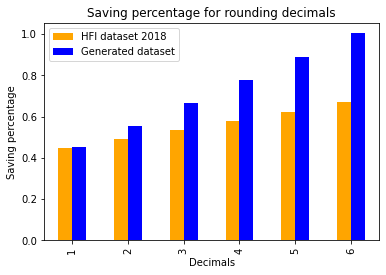

In [12]:
df.plot(kind = "bar", title = "Saving percentage for rounding decimals", color = ("orange", "blue"))
plt.ylabel('Saving percentage') 
plt.xlabel('Decimals')